<a href="https://colab.research.google.com/github/vaalessi/Hypergraph_playground/blob/main/Hypergraph_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Set up the Google Colab notebook

#Go to https://colab.research.google.com/
#Click on "New Notebook"
#Rename the notebook to "Hypergraph_Evaluation" by clicking on "Untitled0" at the top of the page and typing the new name

In [ ]:
#Step 2: Install required libraries
#In the first cell of your notebook, paste the following code and click the play button to run it:

In [ ]:
!pip install networkx matplotlib memory_profiler scipy scikit-learn tqdm

In [ ]:
#Step 3: Import required libraries
#In a new cell, paste the following code and run it:

import time
import random
import networkx as nx
import numpy as np
from memory_profiler import memory_usage
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [ ]:
#Step 4: Define the HypergraphIndex class
#In a new cell, paste the following code:

In [ ]:
class HypergraphIndex:
    def __init__(self):
        self.nodes = {}
        self.hyperedges = defaultdict(set)
        self.node_features = {}

    def add_node(self, node_id, features):
        try:
            self.nodes[node_id] = set()
            self.node_features[node_id] = features
        except Exception as e:
            logging.error(f"Error adding node {node_id}: {str(e)}")

    def add_hyperedge(self, edge_id, node_ids):
        try:
            self.hyperedges[edge_id].update(node_ids)
            for node_id in node_ids:
                self.nodes[node_id].add(edge_id)
        except Exception as e:
            logging.error(f"Error adding hyperedge {edge_id}: {str(e)}")

    def get_protocols(self, edge_id):
        try:
            return self.hyperedges[edge_id]
        except KeyError:
            logging.warning(f"Edge {edge_id} not found")
            return set()

    def sophisticated_query(self, query_features, k=5):
        try:
            similarities = {}
            for node_id, features in self.node_features.items():
                similarity = np.dot(query_features, features) / (np.linalg.norm(query_features) * np.linalg.norm(features))
                similarities[node_id] = similarity
            return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]
        except Exception as e:
            logging.error(f"Error in sophisticated query: {str(e)}")
            return []

    def generate_protocol(self, seed_protocols, num_steps=3):
        try:
            current_protocols = set(seed_protocols)
            for _ in range(num_steps):
                next_protocols = set()
                for protocol in current_protocols:
                    edges = self.nodes[protocol]
                    if edges:
                        random_edge = random.choice(list(edges))
                        next_protocols.update(self.hyperedges[random_edge])
                current_protocols = next_protocols
            return current_protocols
        except Exception as e:
            logging.error(f"Error in protocol generation: {str(e)}")
            return set()

    def visualize(self):
        G = nx.Graph()
        for edge, nodes in self.hyperedges.items():
            G.add_node(edge, color='r', size=300)
            for node in nodes:
                G.add_node(node, color='b', size=100)
                G.add_edge(edge, node)

        pos = nx.spring_layout(G)
        colors = [G.nodes[node]['color'] for node in G.nodes()]
        sizes = [G.nodes[node]['size'] for node in G.nodes()]

        plt.figure(figsize=(12, 8))
        nx.draw(G, pos, node_color=colors, node_size=sizes, with_labels=True)
        plt.title("Hypergraph Visualization")
        plt.show()

In [ ]:
#Step 5: Define the TraditionalGraph class
#In a new cell, paste the following code:

In [ ]:
class TraditionalGraph:
    def __init__(self):
        self.graph = nx.Graph()
        self.node_features = {}

    def add_node(self, node_id, features):
        try:
            self.graph.add_node(node_id)
            self.node_features[node_id] = features
        except Exception as e:
            logging.error(f"Error adding node {node_id}: {str(e)}")

    def add_edge(self, node1, node2):
        try:
            self.graph.add_edge(node1, node2)
        except Exception as e:
            logging.error(f"Error adding edge between {node1} and {node2}: {str(e)}")

    def sophisticated_query(self, query_features, k=5):
        try:
            similarities = {}
            for node_id, features in self.node_features.items():
                similarity = np.dot(query_features, features) / (np.linalg.norm(query_features) * np.linalg.norm(features))
                similarities[node_id] = similarity
            return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]
        except Exception as e:
            logging.error(f"Error in sophisticated query: {str(e)}")
            return []

    def generate_protocol(self, seed_protocols, num_steps=3):
        try:
            current_protocols = set(seed_protocols)
            for _ in range(num_steps):
                next_protocols = set()
                for protocol in current_protocols:
                    neighbors = list(self.graph.neighbors(protocol))
                    if neighbors:
                        next_protocols.add(random.choice(neighbors))
                current_protocols = next_protocols
            return current_protocols
        except Exception as e:
            logging.error(f"Error in protocol generation: {str(e)}")
            return set()

    def visualize(self):
        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(12, 8))
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        plt.title("Traditional Graph Visualization")
        plt.show()

In [ ]:
#Step 6: Define the InvertedIndex class
#In a new cell, paste the following code:

class InvertedIndex:
    def __init__(self):
        self.index = defaultdict(set)
        self.node_features = {}

    def add_node(self, node_id, features):
        try:
            self.node_features[node_id] = features
            for i, value in enumerate(features):
                if value != 0:
                    self.index[i].add(node_id)
        except Exception as e:
            logging.error(f"Error adding node {node_id}: {str(e)}")

    def sophisticated_query(self, query_features, k=5):
        try:
            candidates = set.union(*[self.index[i] for i, value in enumerate(query_features) if value != 0])
            similarities = {}
            for node_id in candidates:
                features = self.node_features[node_id]
                similarity = np.dot(query_features, features) / (np.linalg.norm(query_features) * np.linalg.norm(features))
                similarities[node_id] = similarity
            return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]
        except Exception as e:
            logging.error(f"Error in sophisticated query: {str(e)}")
            return []

    def visualize(self):
        plt.figure(figsize=(12, 8))
        plt.spy(csr_matrix((len(self.node_features), len(self.index))), markersize=1)
        plt.title("Inverted Index Visualization")
        plt.xlabel("Feature Index")
        plt.ylabel("Node Index")
        plt.show()


In [ ]:
#Step 7: Define helper functions
#In a new cell, paste the following code:

def generate_synthetic_data(num_protocols, num_features, num_relationships):
    try:
        protocols = {}
        for i in range(num_protocols):
            protocols[f'N{i}'] = normalize(np.random.rand(num_features).reshape(1, -1))[0]

        relationships = []
        for _ in range(num_relationships):
            edge_size = random.randint(2, 5)
            edge = random.sample(list(protocols.keys()), edge_size)
            relationships.append(edge)

        return protocols, relationships
    except Exception as e:
        logging.error(f"Error generating synthetic data: {str(e)}")
        return {}, []

def run_evaluation(num_protocols, num_features, num_relationships, num_trials=5):
    results = defaultdict(list)

    for trial in tqdm(range(num_trials), desc="Trials"):
        try:
            protocols, relationships = generate_synthetic_data(num_protocols, num_features, num_relationships)

            hg = HypergraphIndex()
            tg = TraditionalGraph()
            ii = InvertedIndex()

            # Populate indexes
            for node_id, features in protocols.items():
                hg.add_node(node_id, features)
                tg.add_node(node_id, features)
                ii.add_node(node_id, features)

            for i, edge in enumerate(relationships):
                hg.add_hyperedge(f'H{i}', edge)
                for n1 in edge:
                    for n2 in edge:
                        if n1 != n2:
                            tg.add_edge(n1, n2)

            # Measure query time
            query_features = normalize(np.random.rand(num_features).reshape(1, -1))[0]

            start_time = time.time()
            hg.sophisticated_query(query_features)
            hg_time = time.time() - start_time

            start_time = time.time()
            tg.sophisticated_query(query_features)
            tg_time = time.time() - start_time

            start_time = time.time()
            ii.sophisticated_query(query_features)
            ii_time = time.time() - start_time

            # Measure memory usage
            hg_memory = max(memory_usage((hg.sophisticated_query, (query_features,))))
            tg_memory = max(memory_usage((tg.sophisticated_query, (query_features,))))
            ii_memory = max(memory_usage((ii.sophisticated_query, (query_features,))))

            # Measure protocol generation
            seed_protocols = random.sample(list(protocols.keys()), 2)

            start_time = time.time()
            hg.generate_protocol(seed_protocols)
            hg_gen_time = time.time() - start_time

            start_time = time.time()
            tg.generate_protocol(seed_protocols)
            tg_gen_time = time.time() - start_time

            results['hg_query_time'].append(hg_time)
            results['tg_query_time'].append(tg_time)
            results['ii_query_time'].append(ii_time)
            results['hg_memory'].append(hg_memory)
            results['tg_memory'].append(tg_memory)
            results['ii_memory'].append(ii_memory)
            results['hg_gen_time'].append(hg_gen_time)
            results['tg_gen_time'].append(tg_gen_time)

            if trial == 0:  # Visualize only for the first trial
                hg.visualize()
                tg.visualize()
                ii.visualize()

        except Exception as e:
            logging.error(f"Error in trial {trial}: {str(e)}")

    return {k: np.mean(v) for k, v in results.items()}

def plot_results(sizes, results):
    metrics = ['query_time', 'memory', 'gen_time']
    methods = ['hg', 'tg', 'ii']
    colors = ['b', 'r', 'g']
    labels = {'hg': 'Hypergraph', 'tg': 'Traditional Graph', 'ii': 'Inverted Index'}

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, metric in enumerate(metrics):
        for method, color in zip(methods, colors):
            if f'{method}_{metric}' in results[0]:
                axes[i].plot(sizes, [r[f'{method}_{metric}'] for r in results], color=color, label=labels[method], marker='o')

        axes[i].set_xlabel('Number of Protocols')
        axes[i].set_ylabel(metric.replace('_', ' ').title())
        axes[i].legend()
        axes[i].set_title(f'{metric.replace("_", " ").title()} Comparison')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('performance_comparison.png')
    plt.show()

def visualize_data_distribution(protocols, relationships):
    # Visualize feature distribution
    feature_means = np.mean(list(protocols.values()), axis=0)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(feature_means)), feature_means)
    plt.title("Average Feature Values Across Protocols")
    plt.xlabel("Feature Index")
    plt.ylabel("Average Value")
    plt.show()

    # Visualize relationship sizes
    relationship_sizes = [len(r) for r in relationships]
    plt.figure(figsize=(10, 5))
    plt.hist(relationship_sizes, bins=range(min(relationship_sizes), max(relationship_sizes) + 2, 1))
    plt.title("Distribution of Relationship Sizes")
    plt.xlabel("Number of Protocols in Relationship")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
#Step 8: Run the evaluation
#In a new cell, paste and run the following code:

Evaluating with 100 protocols...


Trials:   0%|          | 0/5 [00:00<?, ?it/s]

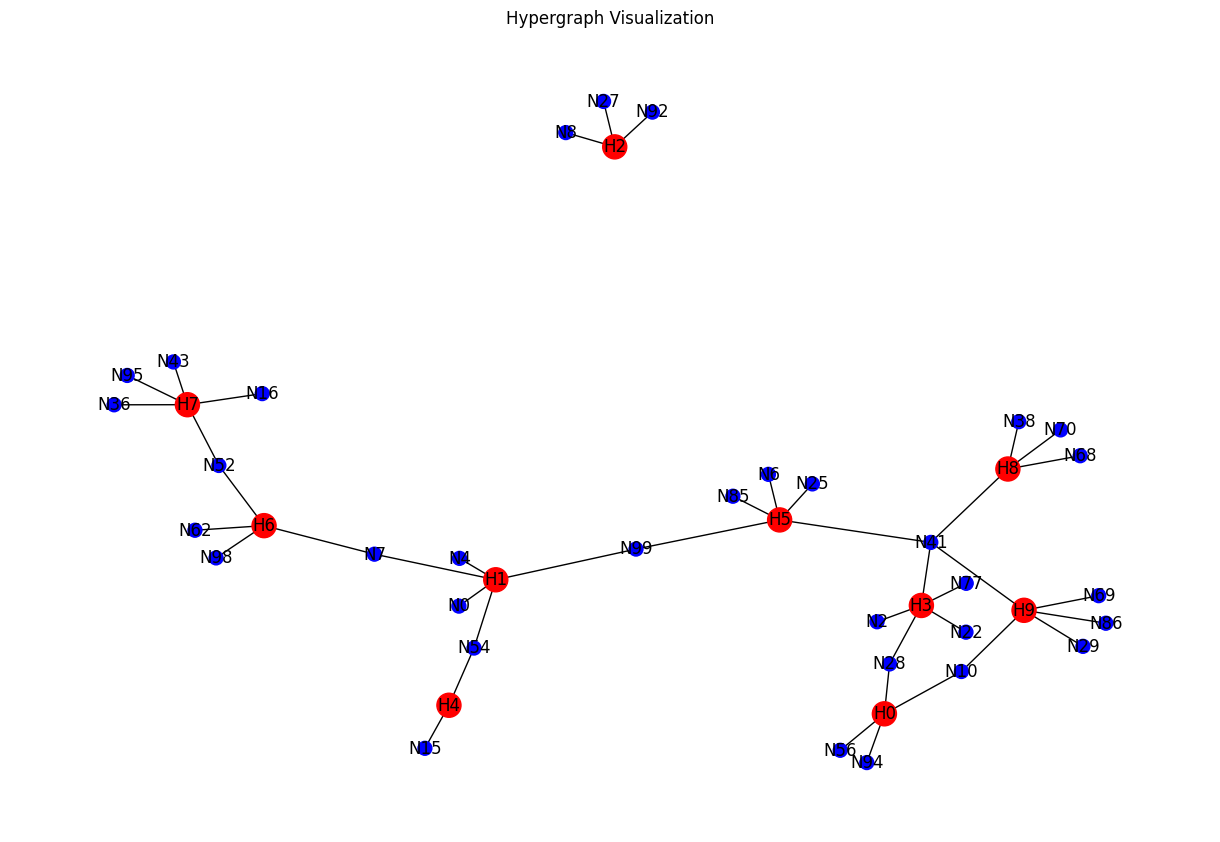

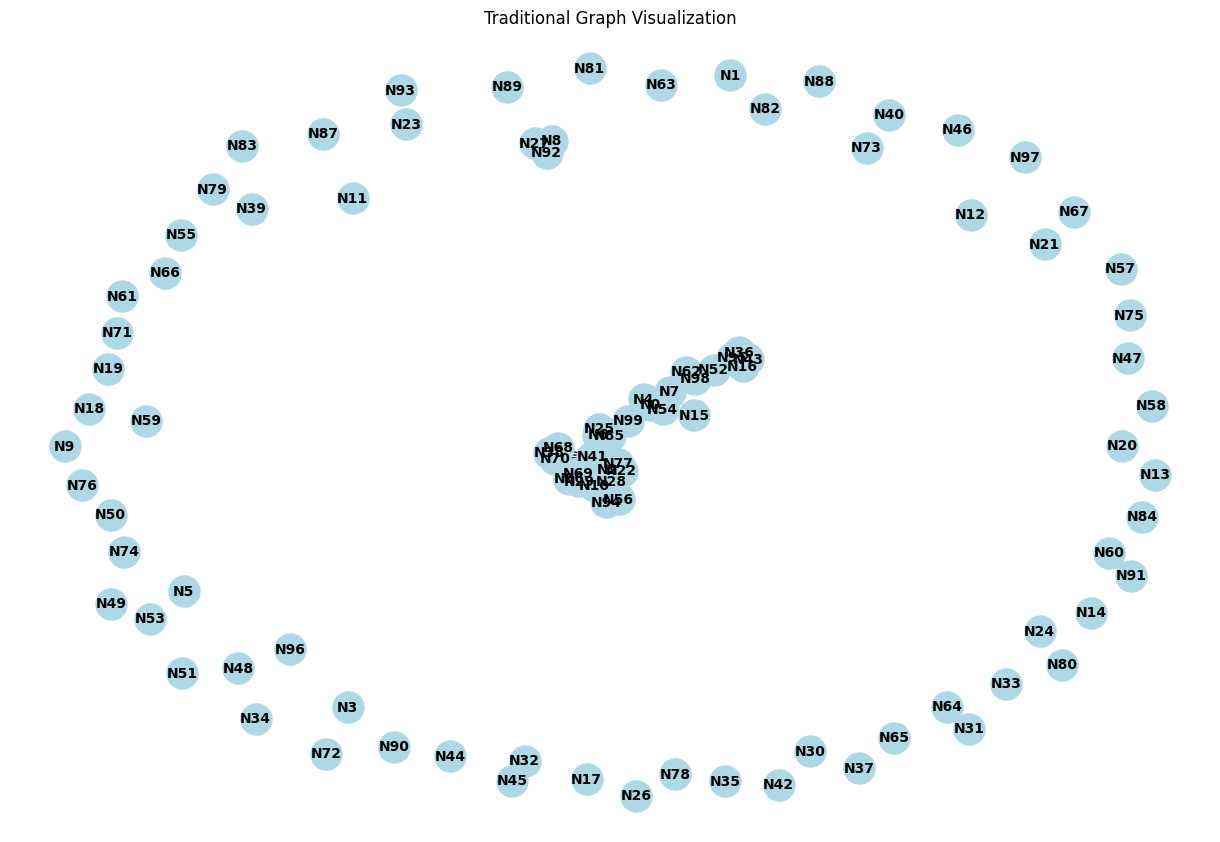

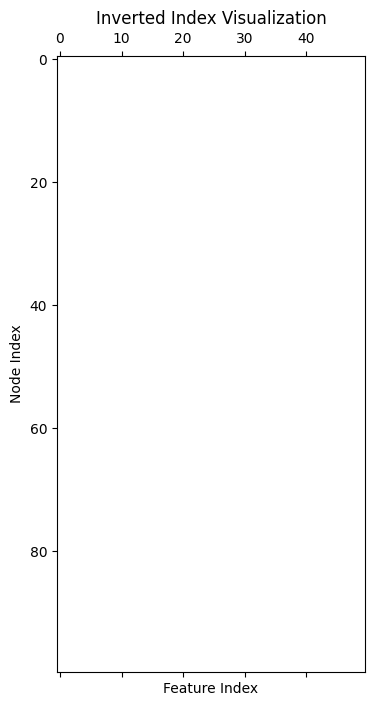

Trials: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


Evaluating with 500 protocols...


Trials:   0%|          | 0/5 [00:00<?, ?it/s]

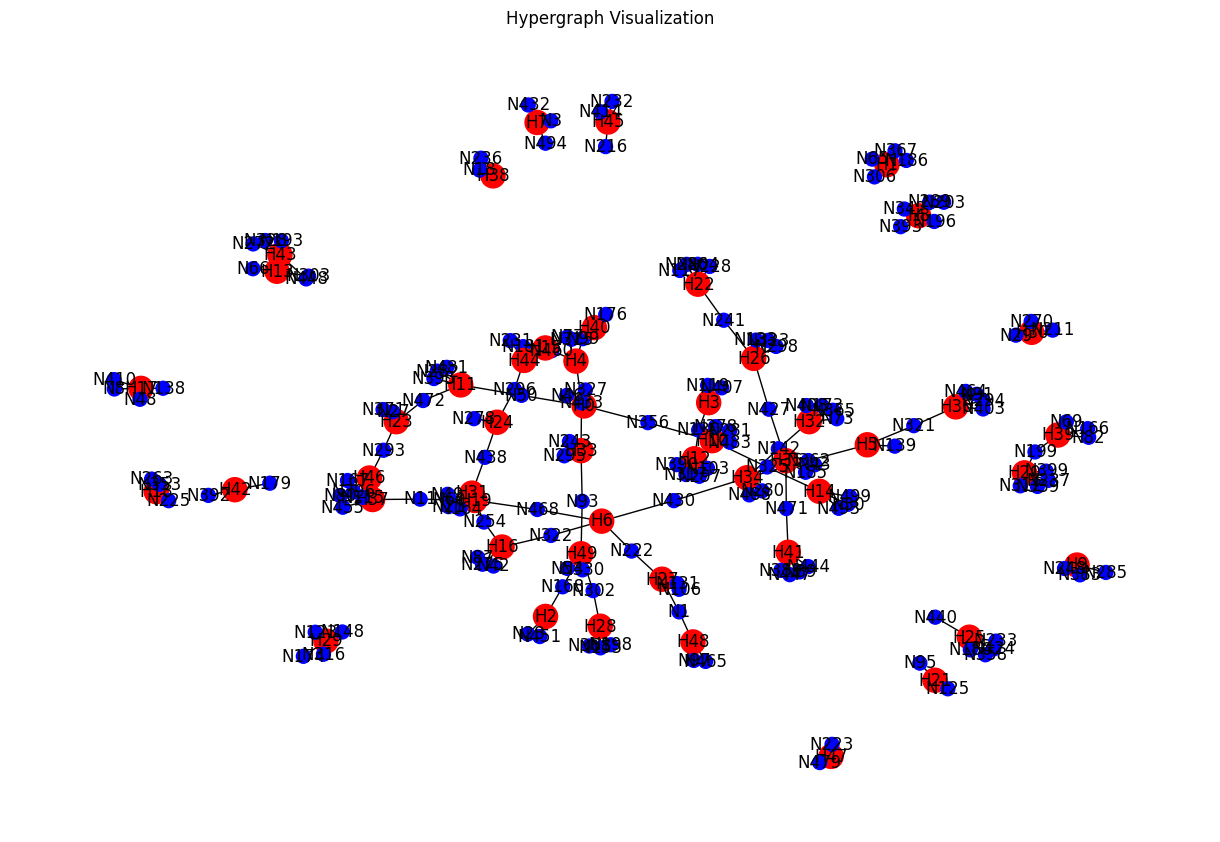

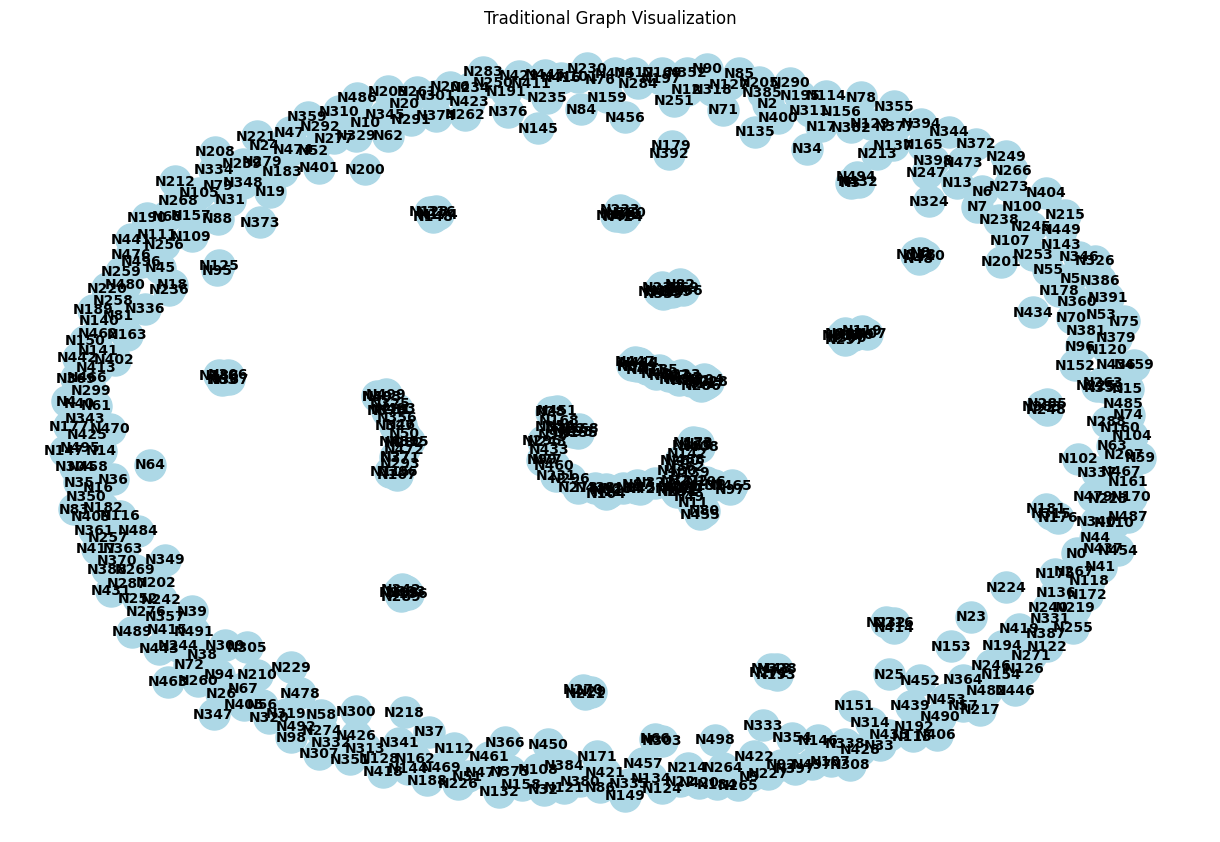

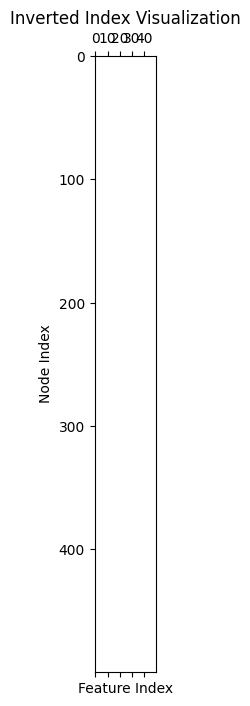

Trials: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Evaluating with 1000 protocols...


Trials:   0%|          | 0/5 [00:00<?, ?it/s]

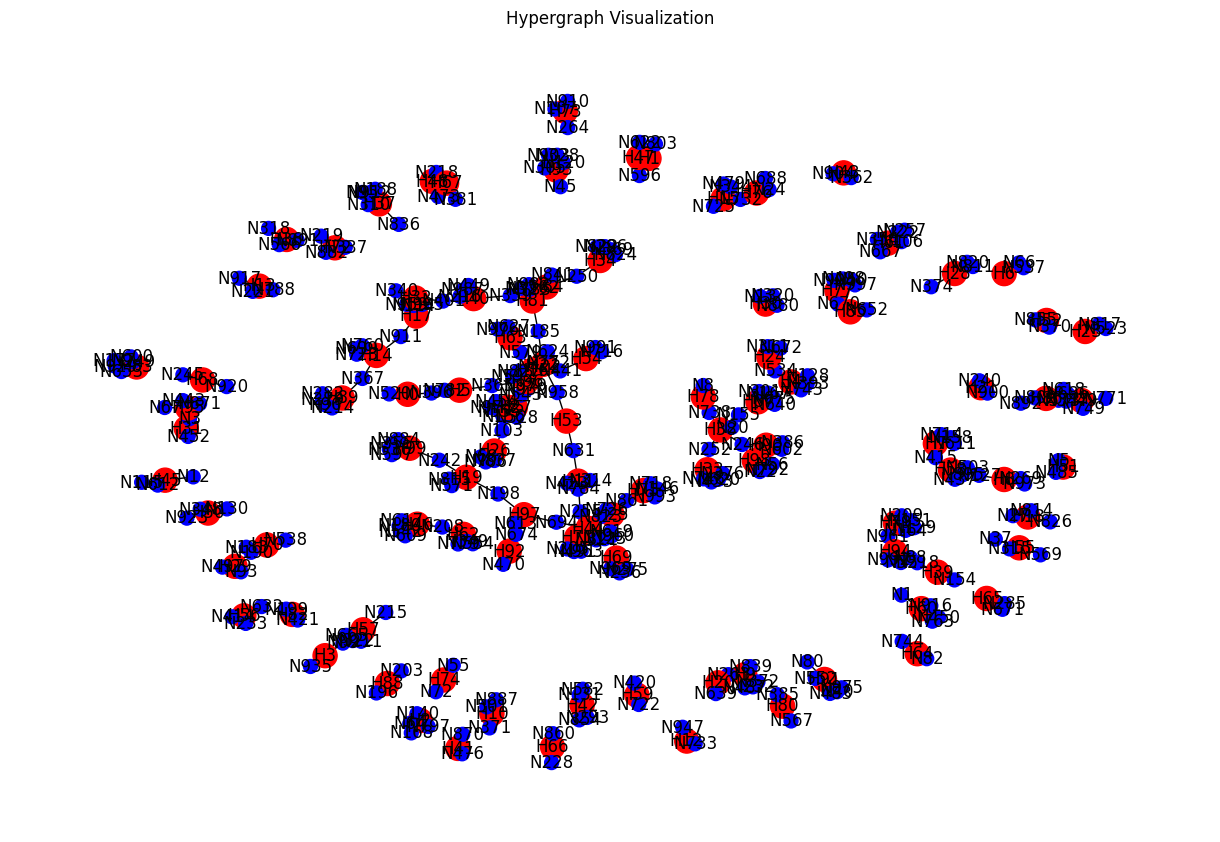

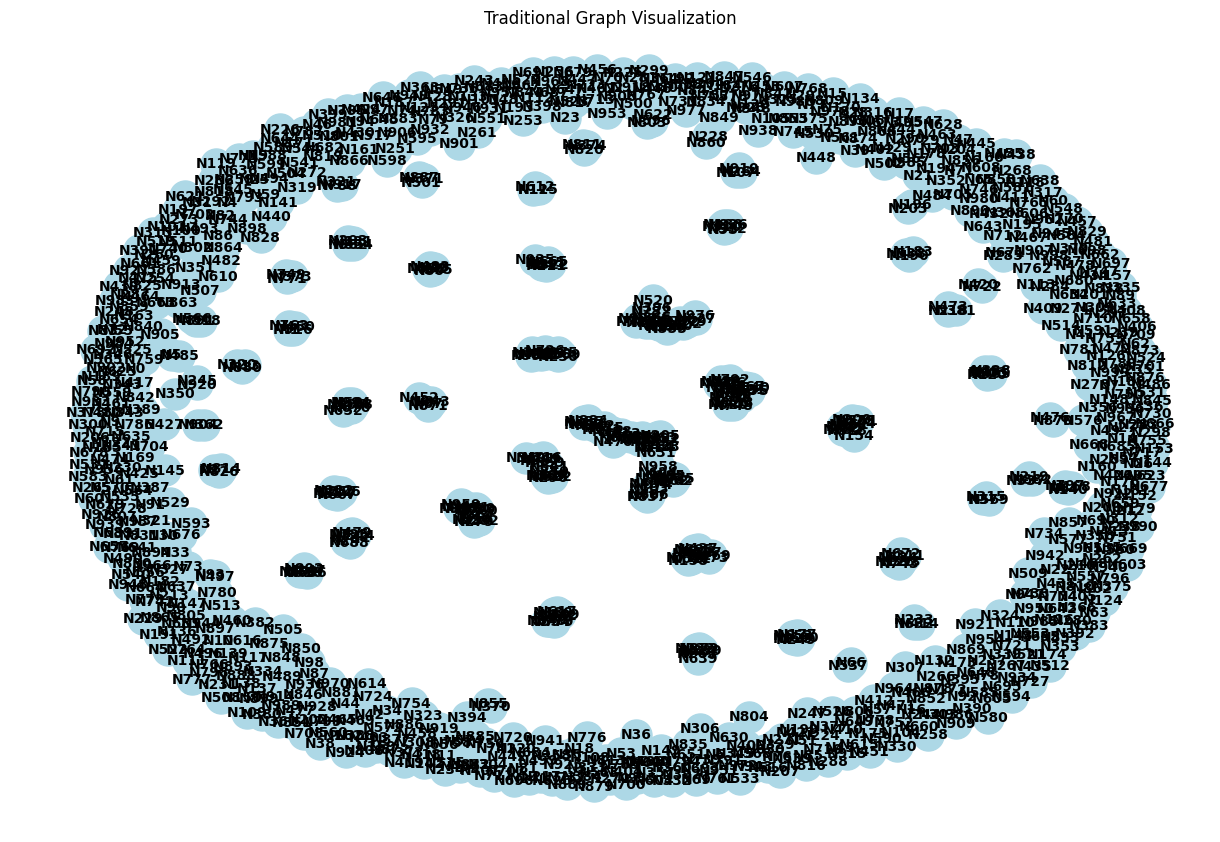

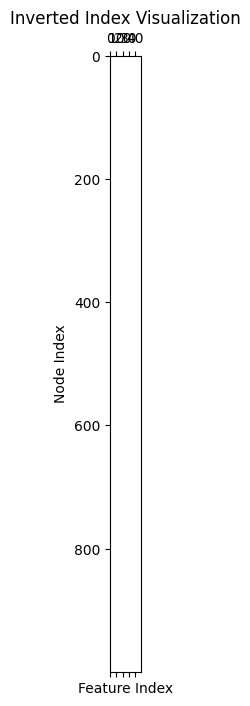

Trials: 100%|██████████| 5/5 [00:13<00:00,  2.71s/it]


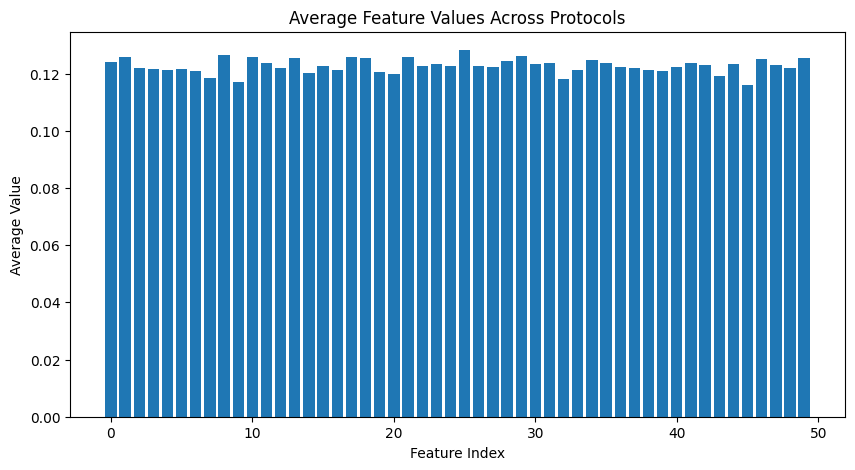

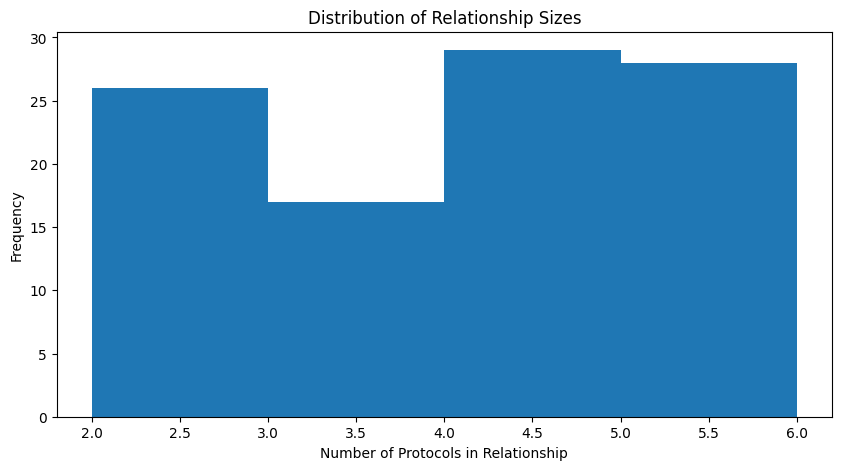

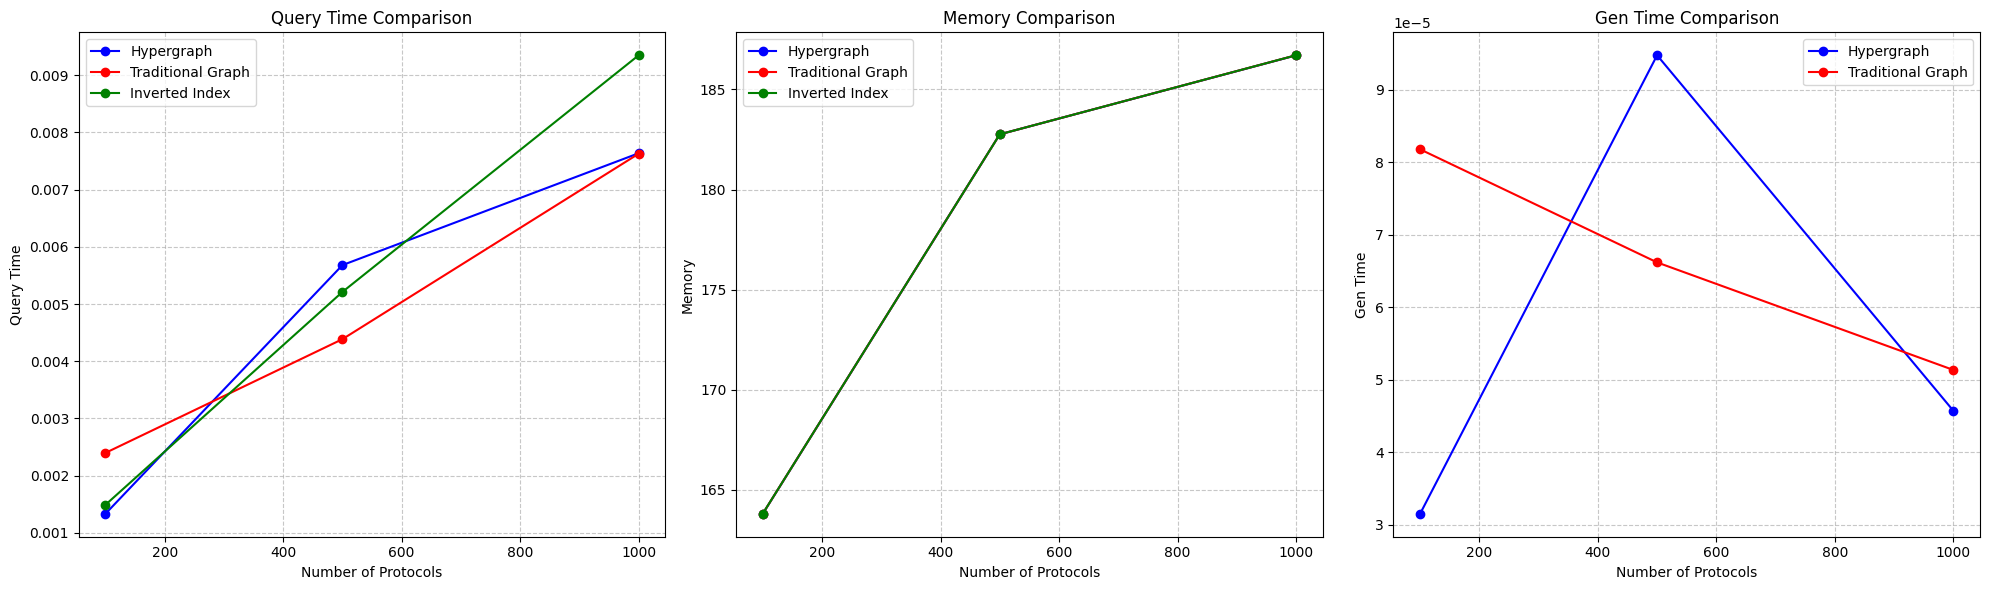

Evaluation complete. Results plotted above.


In [ ]:
# Run evaluations for different sizes
sizes = [100, 500, 1000]  # Reduced sizes for quicker execution
all_results = []

for size in sizes:
    print(f"Evaluating with {size} protocols...")
    results = run_evaluation(size, 50, size // 10)
    all_results.append(results)

    # Visualize data distribution for the last size
    if size == sizes[-1]:
        protocols, relationships = generate_synthetic_data(size, 50, size // 10)
        visualize_data_distribution(protocols, relationships)

# Plot results
plot_results(sizes, all_results)

print("Evaluation complete. Results plotted above.")

In [ ]:
import networkx as nx
from networkx.readwrite import gexf

class HypergraphIndex:
    # ... (existing code) ...

    def export_to_gexf(self, filename):
        G = nx.Graph()

        # Add protocol nodes
        for node in self.nodes:
            G.add_node(node, type='protocol')

        # Add hyperedge nodes and connect them to protocols
        for edge_id, protocols in self.hyperedges.items():
            G.add_node(edge_id, type='hyperedge')
            for protocol in protocols:
                G.add_edge(edge_id, protocol)

        # Write to GEXF file
        nx.write_gexf(G, filename)
        print(f"Hypergraph exported to {filename}")

# After running your evaluation, export the hypergraph
hg = HypergraphIndex()
# ... (populate hg with your data) ...
hg.export_to_gexf("hypergraph.gexf")

AttributeError: 'HypergraphIndex' object has no attribute 'nodes'

In [ ]:
import networkx as nx
from networkx.readwrite import gexf

class HypergraphIndex:
    def __init__(self):
        self.nodes = {}
        self.hyperedges = {}
        self.node_features = {}

    def add_node(self, node_id, features):
        self.nodes[node_id] = set()
        self.node_features[node_id] = features

    def add_hyperedge(self, edge_id, node_ids):
        self.hyperedges[edge_id] = set(node_ids)
        for node_id in node_ids:
            self.nodes[node_id].add(edge_id)

    def export_to_gexf(self, filename):
        G = nx.Graph()

        # Add protocol nodes
        for node in self.nodes:
            G.add_node(node, type='protocol')

        # Add hyperedge nodes and connect them to protocols
        for edge_id, protocols in self.hyperedges.items():
            G.add_node(edge_id, type='hyperedge')
            for protocol in protocols:
                G.add_edge(edge_id, protocol)

        # Write to GEXF file
        nx.write_gexf(G, filename)
        print(f"Hypergraph exported to {filename}")

# Create a small example hypergraph
hg = HypergraphIndex()

# Add some nodes (protocols)
for i in range(10):
    hg.add_node(f'P{i}', features=[])  # We're not using features in this example

# Add some hyperedges
hg.add_hyperedge('E1', ['P0', 'P1', 'P2'])
hg.add_hyperedge('E2', ['P1', 'P3', 'P4'])
hg.add_hyperedge('E3', ['P2', 'P4', 'P5', 'P6'])
hg.add_hyperedge('E4', ['P6', 'P7', 'P8', 'P9'])

# Export the hypergraph
hg.export_to_gexf("hypergraph.gexf")


Hypergraph exported to hypergraph.gexf


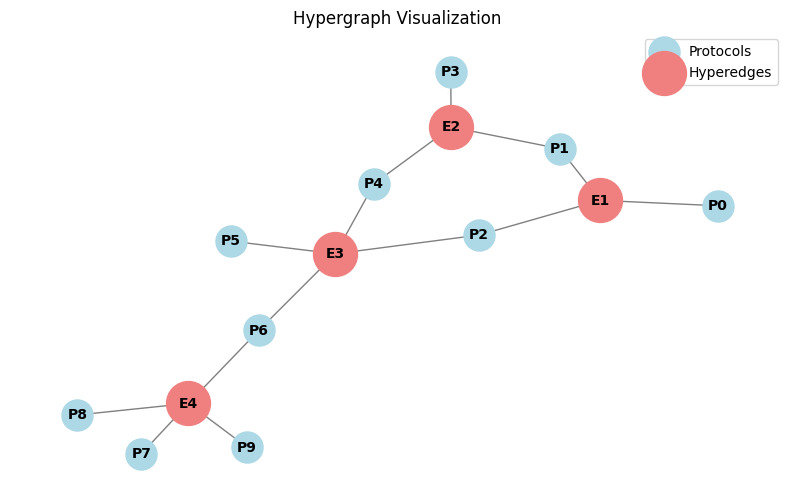

In [ ]:
# prompt: please visualize the.gexf file you made

import networkx as nx
from networkx.readwrite import gexf
import matplotlib.pyplot as plt

# Load the GEXF file
graph = gexf.read_gexf('hypergraph.gexf')

# Separate nodes by type
protocol_nodes = [n for n, d in graph.nodes(data=True) if d['type'] == 'protocol']
hyperedge_nodes = [n for n, d in graph.nodes(data=True) if d['type'] == 'hyperedge']

# Set positions for nodes (you might need to adjust this)
pos = nx.spring_layout(graph)

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(graph, pos, nodelist=protocol_nodes, node_color='lightblue', node_size=500, label='Protocols')
nx.draw_networkx_nodes(graph, pos, nodelist=hyperedge_nodes, node_color='lightcoral', node_size=1000, label='Hyperedges')
nx.draw_networkx_edges(graph, pos, edge_color='gray')
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

plt.title("Hypergraph Visualization")
plt.legend()
plt.axis('off')  # Turn off the axis
plt.show()


In [ ]:
.

SyntaxError: invalid syntax (<ipython-input-23-a5d5b61aa8a6>, line 1)

SyntaxError: unterminated string literal (detected at line 25) (<ipython-input-24-3b230d5840d0>, line 25)

Trials: 100%|██████████| 5/5 [03:24<00:00, 40.95s/it]


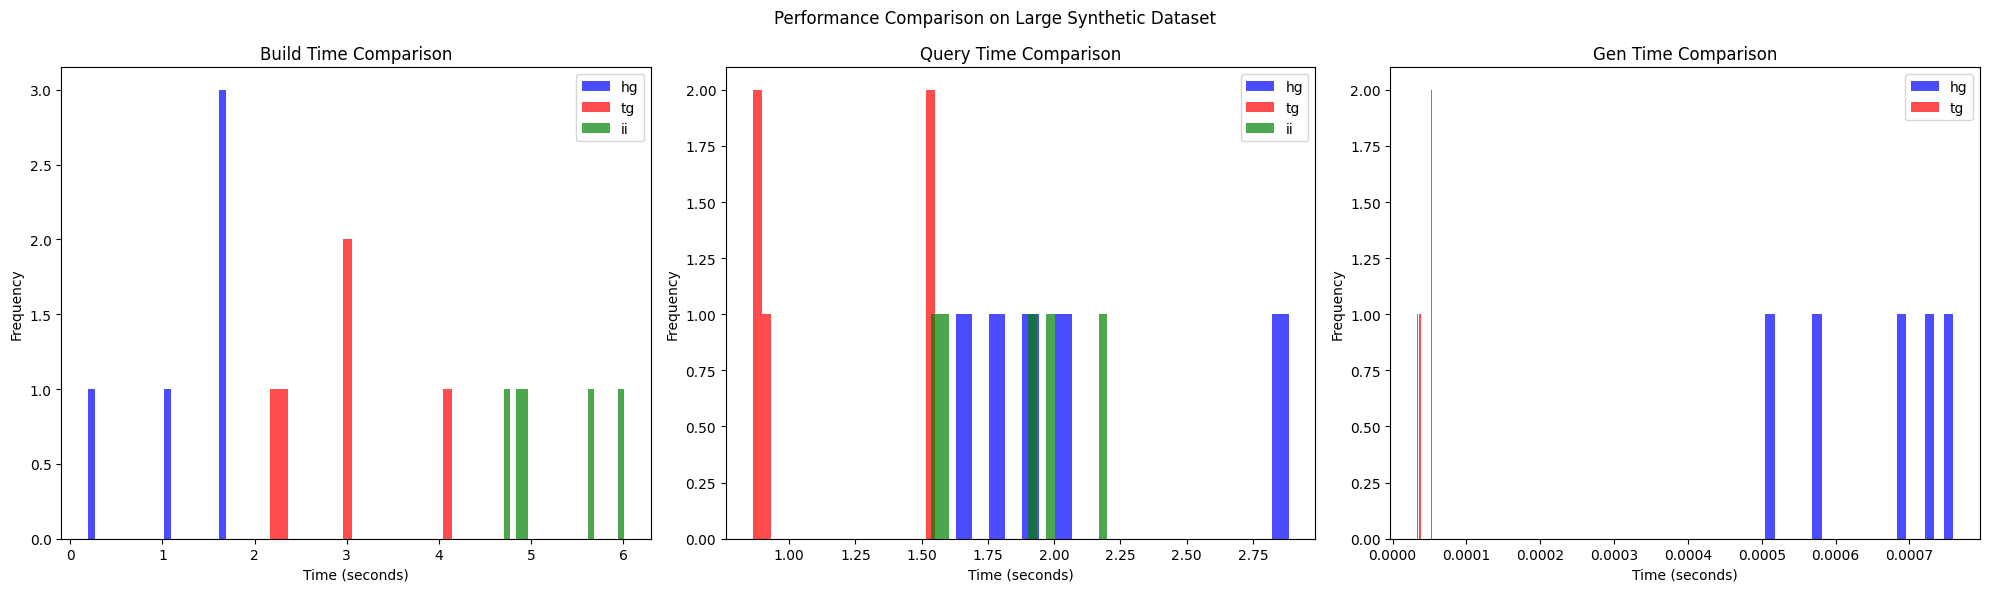

Average HG build_time: 1.2498 seconds
Average TG build_time: 2.9381 seconds
Average II build_time: 5.2339 seconds
Average HG query_time: 2.0516 seconds
Average TG query_time: 1.1465 seconds
Average II query_time: 1.8439 seconds
Average HG gen_time: 0.0007 seconds
Average TG gen_time: 0.0000 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
import time
import random
from sklearn.preprocessing import normalize
import networkx as nx

class HypergraphIndex:
    def __init__(self):
        self.nodes = {}
        self.hyperedges = {}
        self.node_features = {}

    def add_node(self, node_id, features):
        self.nodes[node_id] = set()
        self.node_features[node_id] = features

    def add_hyperedge(self, edge_id, node_ids):
        self.hyperedges[edge_id] = set(node_ids)
        for node_id in node_ids:
            self.nodes[node_id].add(edge_id)

    def sophisticated_query(self, query_features, k=5):
        similarities = {}
        for node_id, features in self.node_features.items():
            similarity = np.dot(query_features, features) / (np.linalg.norm(query_features) * np.linalg.norm(features))
            similarities[node_id] = similarity
        return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]

    def generate_protocol(self, seed_protocols, num_steps=3):
        current_protocols = set(seed_protocols)
        for _ in range(num_steps):
            next_protocols = set()
            for protocol in current_protocols:
                edges = self.nodes[protocol]
                if edges:
                    random_edge = random.choice(list(edges))
                    next_protocols.update(self.hyperedges[random_edge])
            current_protocols = next_protocols
        return current_protocols

class TraditionalGraph:
    def __init__(self):
        self.graph = nx.Graph()
        self.node_features = {}

    def add_node(self, node_id, features):
        self.graph.add_node(node_id)
        self.node_features[node_id] = features

    def add_edge(self, node1, node2):
        self.graph.add_edge(node1, node2)

    def sophisticated_query(self, query_features, k=5):
        similarities = {}
        for node_id, features in self.node_features.items():
            similarity = np.dot(query_features, features) / (np.linalg.norm(query_features) * np.linalg.norm(features))
            similarities[node_id] = similarity
        return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]

    def generate_protocol(self, seed_protocols, num_steps=3):
        current_protocols = set(seed_protocols)
        for _ in range(num_steps):
            next_protocols = set()
            for protocol in current_protocols:
                neighbors = list(self.graph.neighbors(protocol))
                if neighbors:
                    next_protocols.add(random.choice(neighbors))
            current_protocols = next_protocols
        return current_protocols

class InvertedIndex:
    def __init__(self):
        self.index = defaultdict(set)
        self.node_features = {}

    def add_node(self, node_id, features):
        self.node_features[node_id] = features
        for i, value in enumerate(features):
            if value != 0:
                self.index[i].add(node_id)

    def sophisticated_query(self, query_features, k=5):
        candidates = set.union(*[self.index[i] for i, value in enumerate(query_features) if value != 0])
        similarities = {}
        for node_id in candidates:
            features = self.node_features[node_id]
            similarity = np.dot(query_features, features) / (np.linalg.norm(query_features) * np.linalg.norm(features))
            similarities[node_id] = similarity
        return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]

def generate_large_synthetic_data(num_protocols=100000, num_features=100, num_relationships=10000):
    protocols = {}
    for i in range(num_protocols):
        protocols[f'N{i}'] = normalize(np.random.rand(num_features).reshape(1, -1))[0]

    relationships = []
    for _ in range(num_relationships):
        edge_size = random.randint(2, 20)  # Allowing for larger hyperedges
        edge = random.sample(list(protocols.keys()), edge_size)
        relationships.append(edge)

    return protocols, relationships

def run_large_scale_evaluation(num_trials=5):
    results = defaultdict(list)

    for trial in tqdm(range(num_trials), desc="Trials"):
        protocols, relationships = generate_large_synthetic_data()

        hg = HypergraphIndex()
        tg = TraditionalGraph()
        ii = InvertedIndex()

        # Populate indexes
        start_time = time.time()
        for node_id, features in protocols.items():
            hg.add_node(node_id, features)
        for i, edge in enumerate(relationships):
            hg.add_hyperedge(f'H{i}', edge)
        results['hg_build_time'].append(time.time() - start_time)

        start_time = time.time()
        for node_id, features in protocols.items():
            tg.add_node(node_id, features)
        for edge in relationships:
            for n1 in edge:
                for n2 in edge:
                    if n1 != n2:
                        tg.add_edge(n1, n2)
        results['tg_build_time'].append(time.time() - start_time)

        start_time = time.time()
        for node_id, features in protocols.items():
            ii.add_node(node_id, features)
        results['ii_build_time'].append(time.time() - start_time)

        # Measure query time
        query_features = normalize(np.random.rand(100).reshape(1, -1))[0]

        start_time = time.time()
        hg.sophisticated_query(query_features)
        results['hg_query_time'].append(time.time() - start_time)

        start_time = time.time()
        tg.sophisticated_query(query_features)
        results['tg_query_time'].append(time.time() - start_time)

        start_time = time.time()
        ii.sophisticated_query(query_features)
        results['ii_query_time'].append(time.time() - start_time)

        # Measure protocol generation time
        seed_protocols = random.sample(list(protocols.keys()), 2)

        start_time = time.time()
        hg.generate_protocol(seed_protocols)
        results['hg_gen_time'].append(time.time() - start_time)

        start_time = time.time()
        tg.generate_protocol(seed_protocols)
        results['tg_gen_time'].append(time.time() - start_time)

    return results

# Run the evaluation
results = run_large_scale_evaluation()

# Create histogram
metrics = ['build_time', 'query_time', 'gen_time']
methods = ['hg', 'tg', 'ii']
colors = ['blue', 'red', 'green']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Performance Comparison on Large Synthetic Dataset")

for i, metric in enumerate(metrics):
    for method, color in zip(methods, colors):
        if f'{method}_{metric}' in results:
            axes[i].hist(results[f'{method}_{metric}'], bins=20, alpha=0.7, color=color, label=method)

    axes[i].set_xlabel('Time (seconds)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{metric.replace("_", " ").title()} Comparison')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print average times
for metric in metrics:
    for method in methods:
        if f'{method}_{metric}' in results:
            avg_time = np.mean(results[f'{method}_{metric}'])
            print(f"Average {method.upper()} {metric}: {avg_time:.4f} seconds")